In [1]:
# STAT 381: Introduction to Bayesian Statistics
# Author: Cory Suzuki

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Posterior parameters: a = 8, b = 6


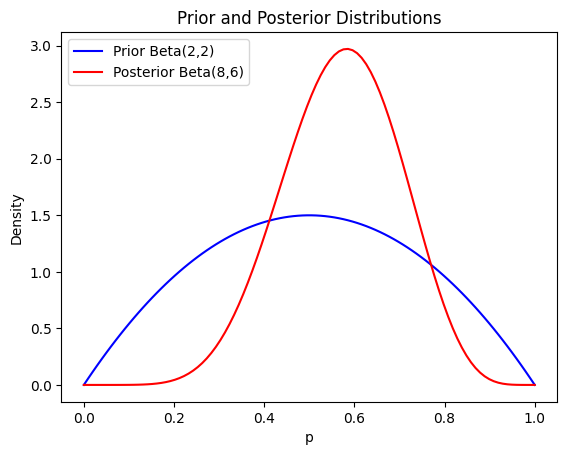

In [3]:
# Suppose data samples are iid Bernoulli with unknown parameter p. p has a Beta(a,b) prior.

def posterior_beta_bernoulli(a, b, data):
    successes = sum(data)
    failures = len(data) - successes
    posterior_a = a + successes
    posterior_b = b + failures
    return posterior_a, posterior_b

# Example usage
a_prior = 2
b_prior = 2
data_samples = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]  # Example data
posterior_a, posterior_b = posterior_beta_bernoulli(a_prior, b_prior, data_samples)
print(f"Posterior parameters: a = {posterior_a}, b = {posterior_b}")

# Plotting the prior and posterior distributions
x = np.linspace(0, 1, 100)
prior_pdf = stats.beta.pdf(x, a_prior, b_prior)
posterior_pdf = stats.beta.pdf(x, posterior_a, posterior_b)
plt.plot(x, prior_pdf, label='Prior Beta(2,2)', color='blue')
plt.plot(x, posterior_pdf, label=f'Posterior Beta({posterior_a},{posterior_b})', color='red')
plt.xlabel('p')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.show()

In [11]:
bayes_estimate_mean = posterior_a / (posterior_a + posterior_b)
print(f"Mean: {bayes_estimate_mean:.4f}")

Mean: 0.5714


Posterior parameters: a = 280, b = 101.0


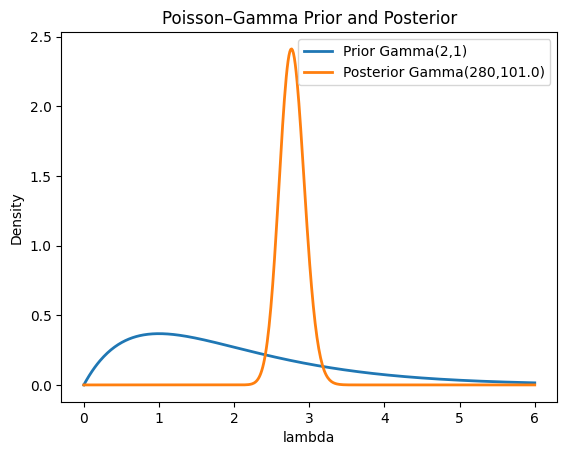

In [29]:
# Another Example: Poisson-Gamma Model (samples are Poisson with unknown lambda and
# lambda has a Gamma(a,b) prior)

def poisson_gamma_posterior(a, b, data):
    sum_data = sum(data)
    n = len(data)
    posterior_a = a + sum_data
    posterior_b = n + (1/b)
    return posterior_a, posterior_b

# Example usage

a_prior = 2
b_prior = 1

np.random.seed(42)
data_samples = np.random.poisson(lam=3, size=100)
posterior_a, posterior_b = poisson_gamma_posterior(a_prior, b_prior, data_samples)
print(f"Posterior parameters: a = {posterior_a}, b = {posterior_b}")

# Plotting the prior and posterior distributions
x = np.linspace(0, 6, 500)

prior_pdf = stats.gamma.pdf(
    x,
    a=a_prior,
    scale=1/b_prior
)

posterior_pdf = stats.gamma.pdf(
    x,
    a=posterior_a,
    scale=1/posterior_b
)

plt.plot(x, prior_pdf, label='Prior Gamma(2,1)', linewidth=2)
plt.plot(x, posterior_pdf,
         label=f'Posterior Gamma({posterior_a},{posterior_b})',
         linewidth=2)

plt.xlabel('lambda')
plt.ylabel('Density')
plt.title('Poisson–Gamma Prior and Posterior')
plt.legend()
plt.show()